# Plot CMIP ZOS fields

In [42]:
import os
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.feature as cfeature
import cartopy.crs as ccrs

sys.path.append('../code/')
import mod_loc as loc
import mod_postpro as pp

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
python_data_dir = '../outputs/'
#ncl_data_dir = '../../Data_Proj/Data_CMIP5/CorrectedZOS_TS_yearly/'
#ar5_data_dir = '../../Data_Proj/Data_AR5/Ocean/1x1_glob/'

In [3]:
def plot_all_models(ds):
    nb_cols = 3
    nb_rows = int(np.ceil(len(ds.model)/nb_cols))
    fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,nb_rows*3))

    for idx, mod in enumerate(ds.model):
        ds['CorrectedReggrided_zos'].isel(time=-1,model=idx).plot(
            ax=axes[int(idx/nb_cols),idx%nb_cols])
    fig.tight_layout()

def plot_all_models2(ds):
    '''Use faceting feature from xarray'''
    cbar_kwargs = {'orientation': 'horizontal','label': 'cm', 'pad': 0.05}
    ds.CorrectedReggrided_zos.isel(time=-1).plot(x='lon', y='lat', col='model', 
                                                    col_wrap=4, robust=True, 
                                                    cbar_kwargs=cbar_kwargs)

In [76]:
cmip5_sce = 'rcp45'
cmip6_sce = 'ssp245'

# Read in the datasets. Make sure to use equivalent scenarios.
cmip5_zos = pp.read_zos_ds(python_data_dir, 'cmip5', cmip5_sce)
cmip6_zos = pp.read_zos_ds(python_data_dir, 'cmip6', cmip6_sce)

### Look at CMIP5 fields

In [77]:
# How many models?
len(cmip5_zos.model)

29

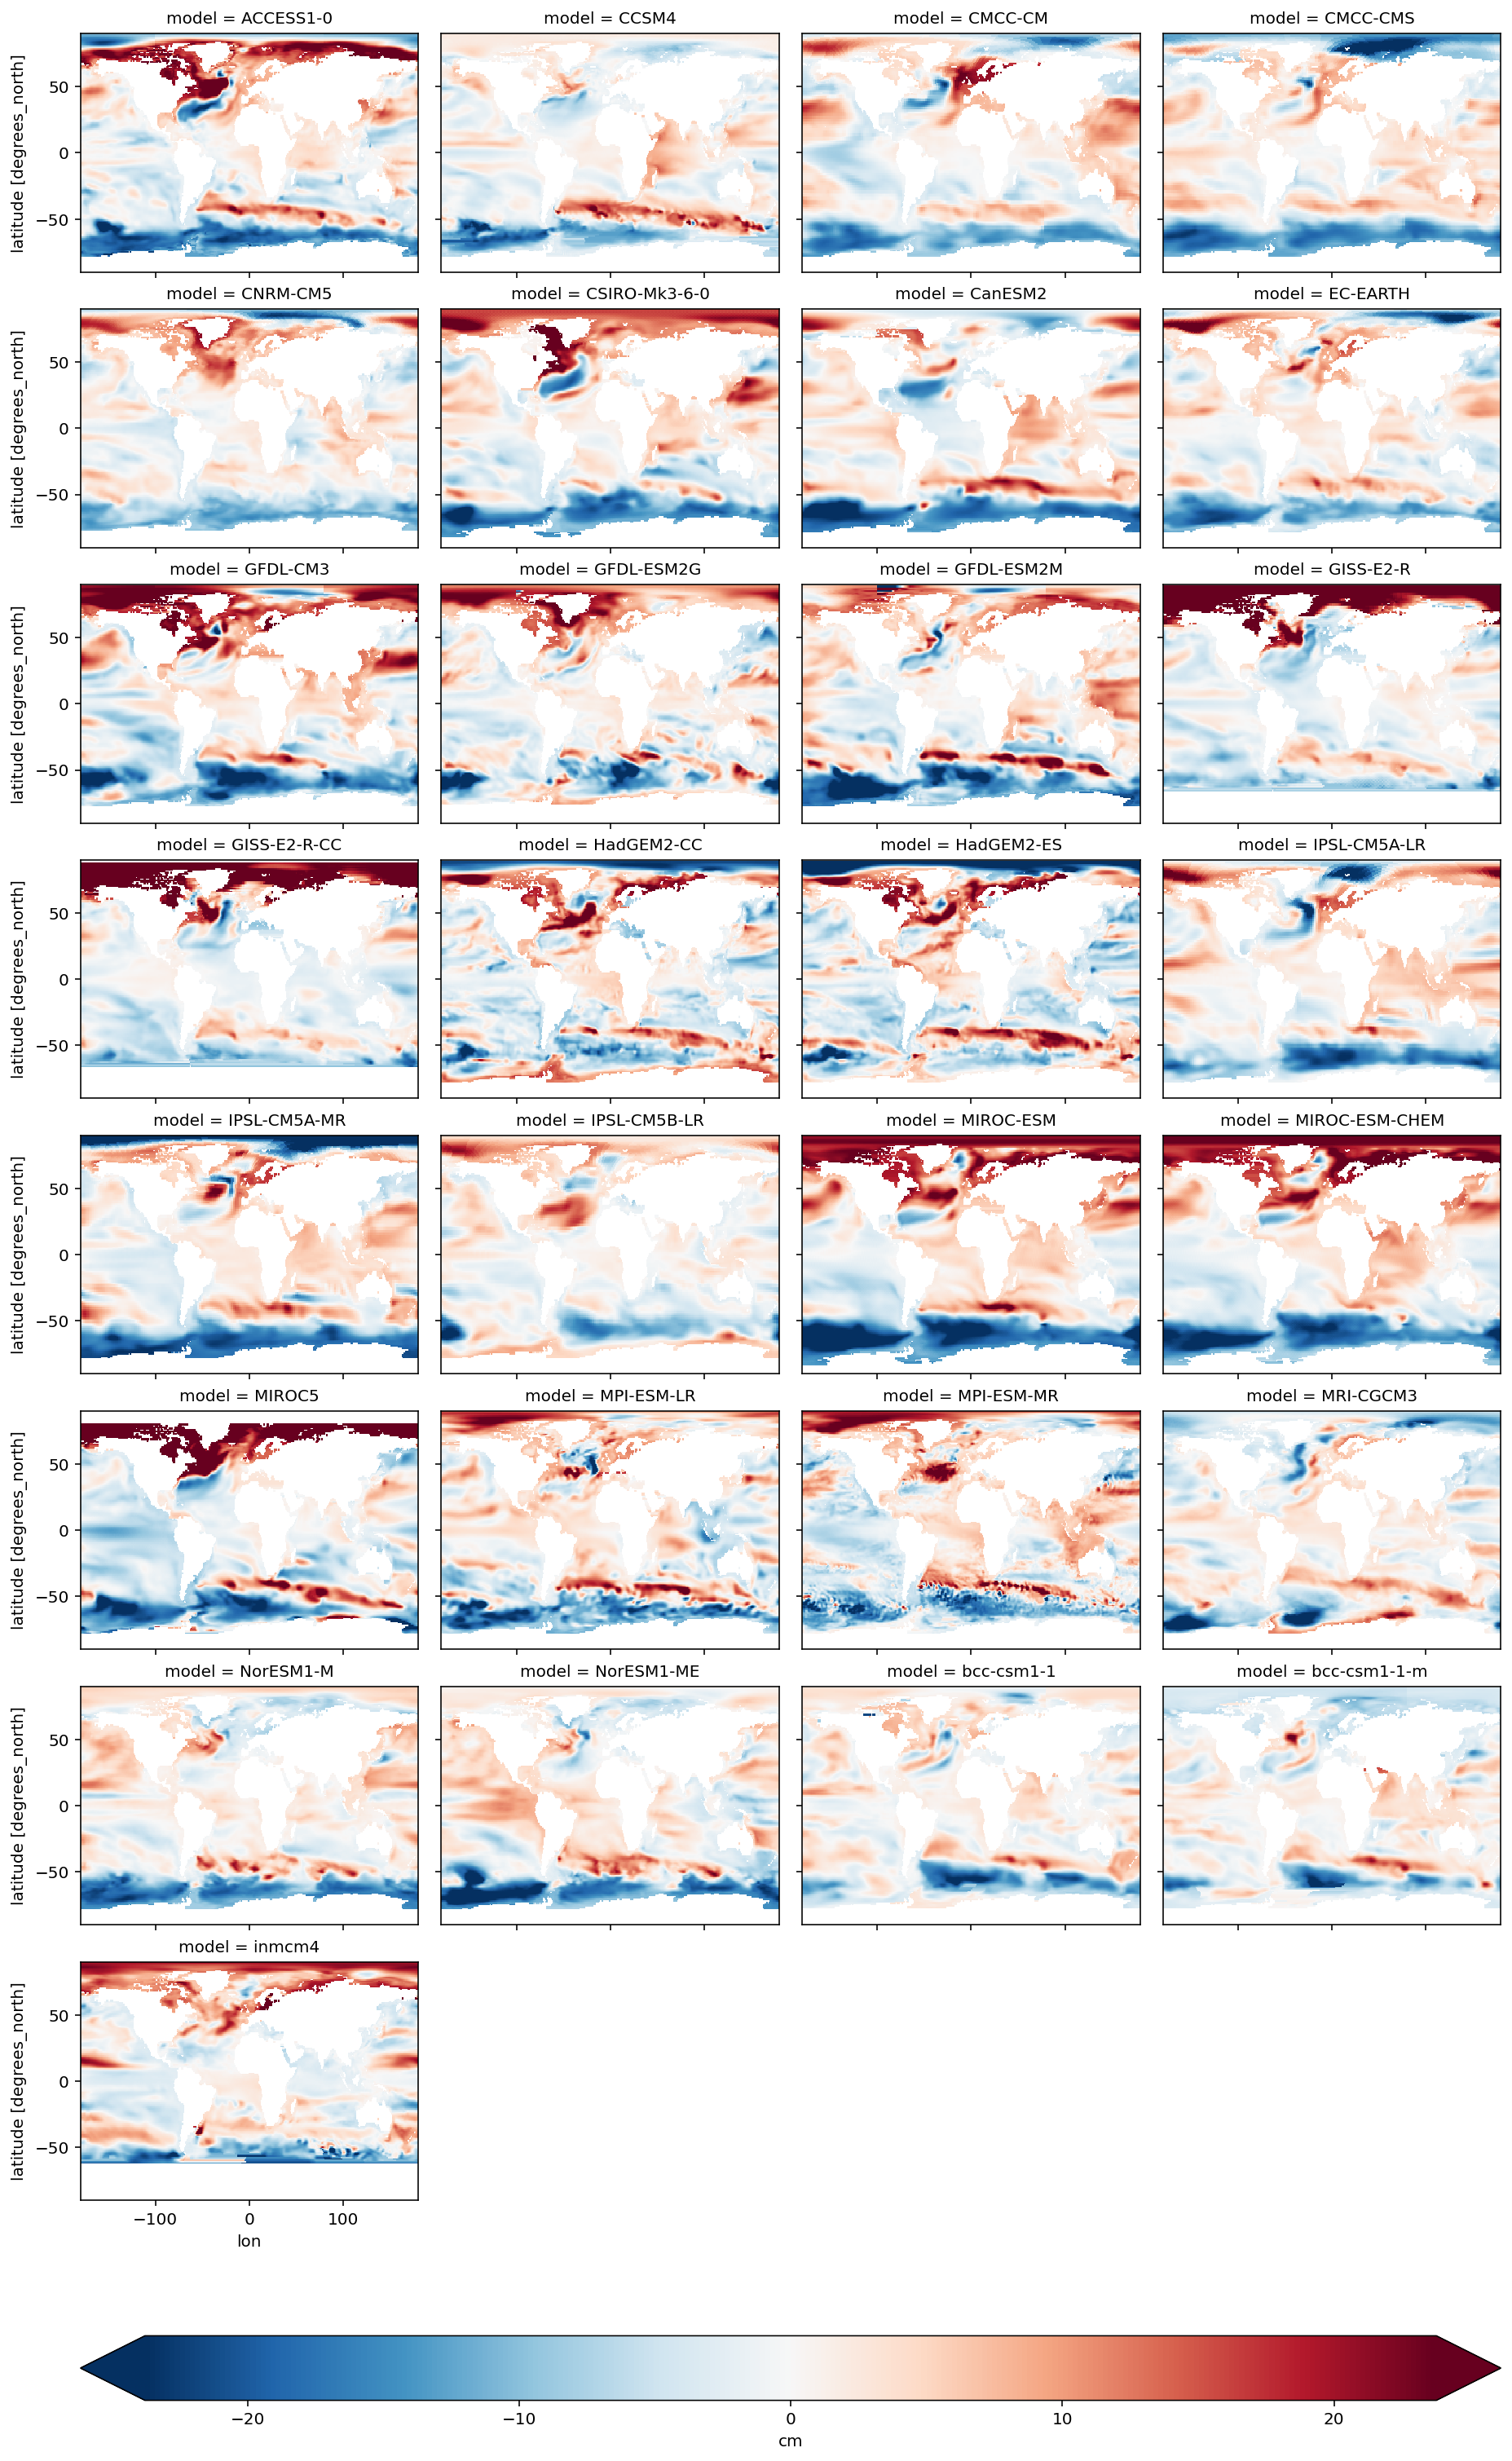

In [78]:
plot_all_models2(cmip5_zos)

### Compute the mean pattern

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


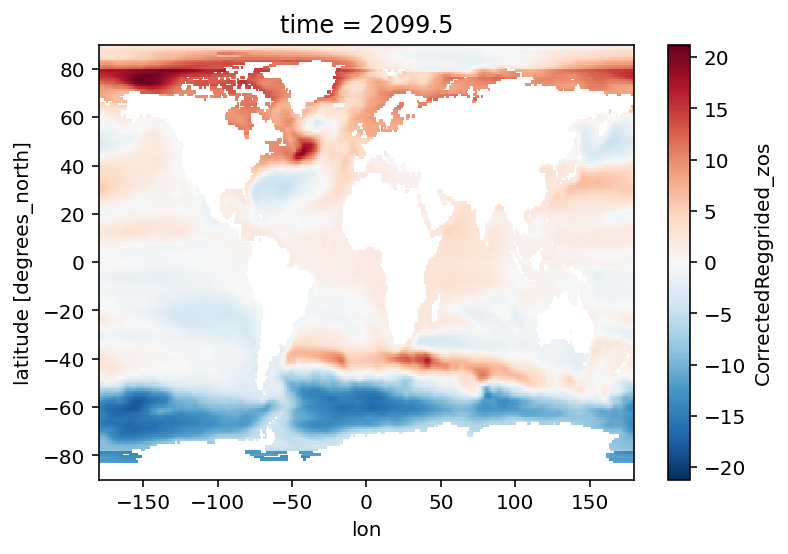

In [79]:
cmip5_zos_m = cmip5_zos['CorrectedReggrided_zos'].mean(dim='model')
cmip5_zos_m.sel(time=2099.5).plot()

### Look at CMIP6 fields

In [80]:
# How many models?
len(cmip6_zos.model)

29

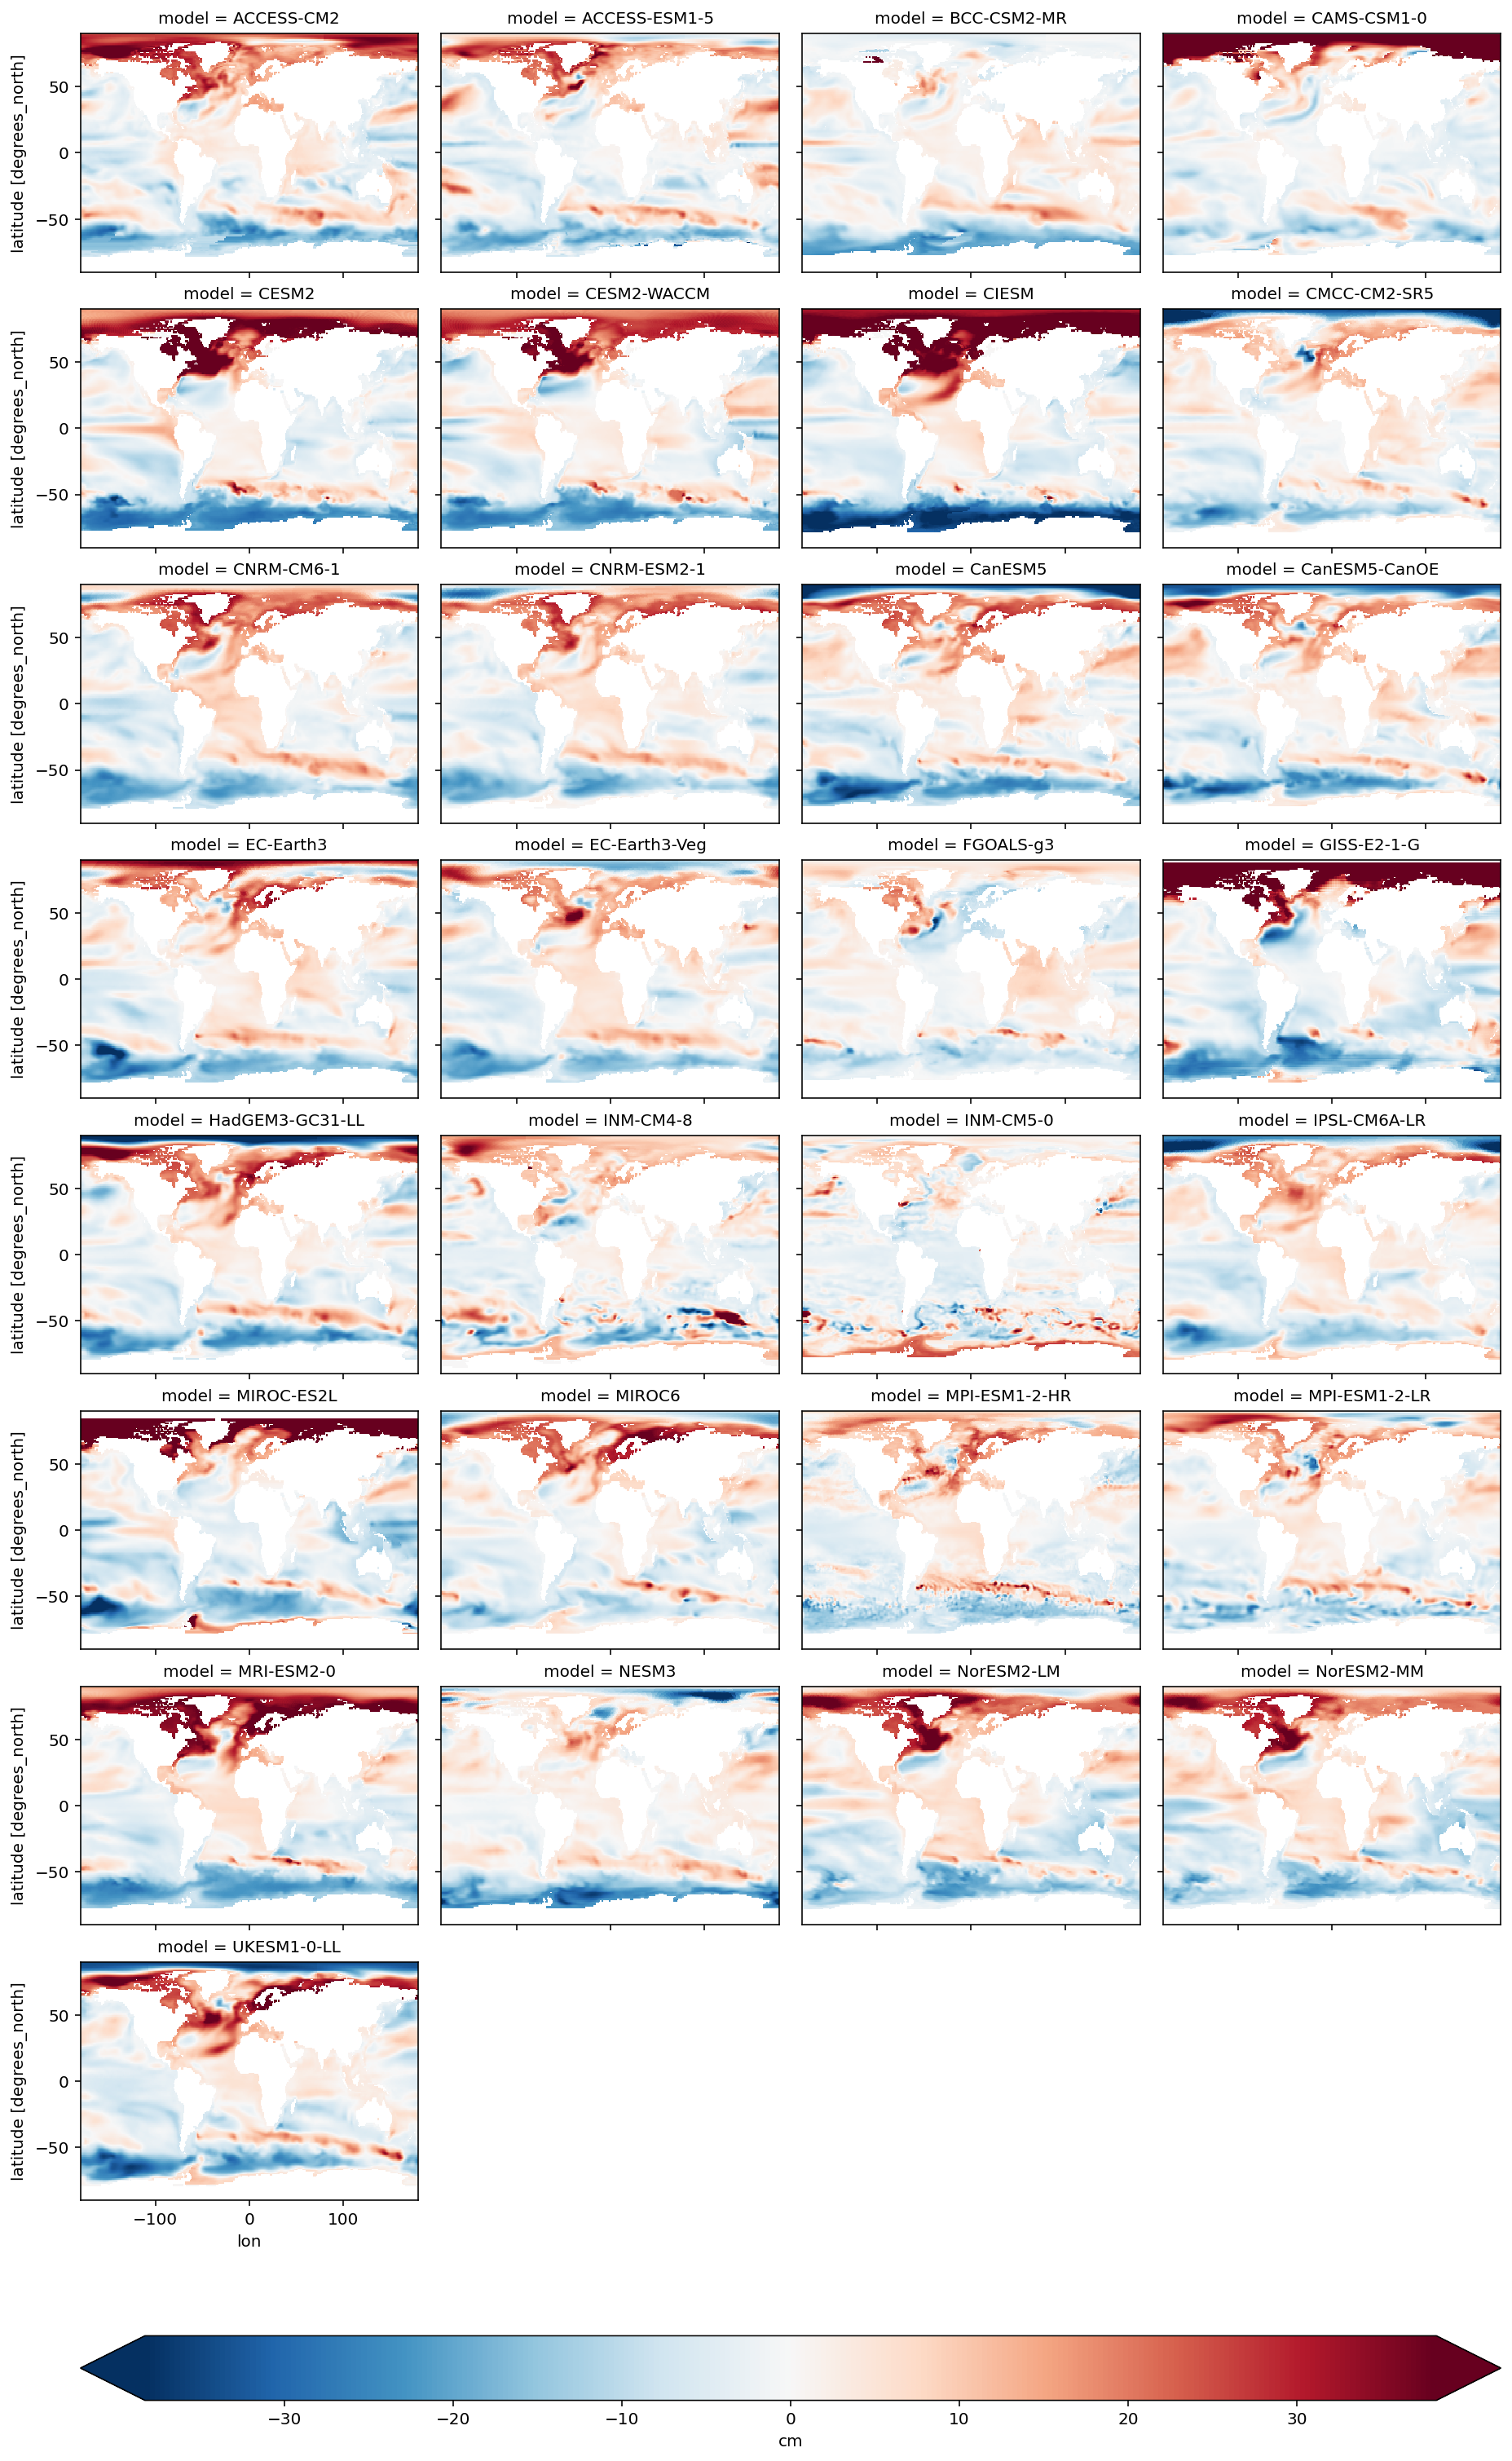

In [81]:
plot_all_models2(cmip6_zos)

In [82]:
#Zoom on Europe
#plot_all_models2(cmip6_zos.sel(lat=slice(35,70), lon=slice(-20,30)))

### Compute the mean pattern

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


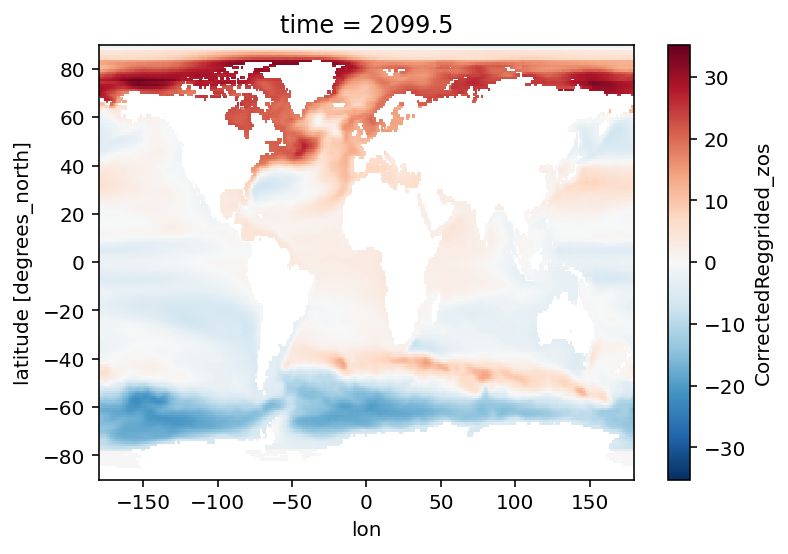

In [83]:
cmip6_zos_m = cmip6_zos['CorrectedReggrided_zos'].mean(dim='model')
cmip6_zos_m.sel(time=2099.5).plot()

### Compare the mean sea level patterns from cmip5 and cmip6

In [86]:
diff_ds = cmip6_zos_m - cmip5_zos_m

new_dim = xr.DataArray(['cmip5', 'cmip6', 'diff'], dims='cmip', name='cmip')
concat = xr.concat([cmip5_zos_m, cmip6_zos_m, diff_ds], dim=new_dim)

concat_mean = concat.sel(time=slice(2095.5,2099.5)).mean(dim='time')

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


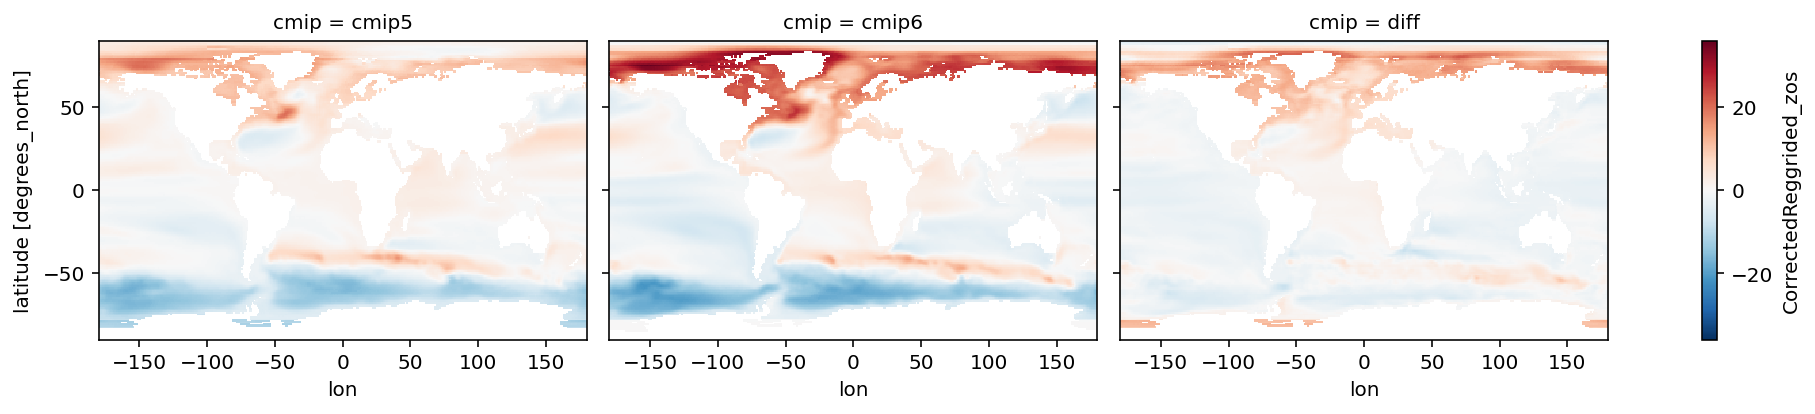

In [87]:
concat_mean.plot(col='cmip', figsize=(14,3))

#plt.savefig(f'../figures/zos_comp_{cmip5_sce}_{cmip6_sce}_world.pdf', dpi=150)

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


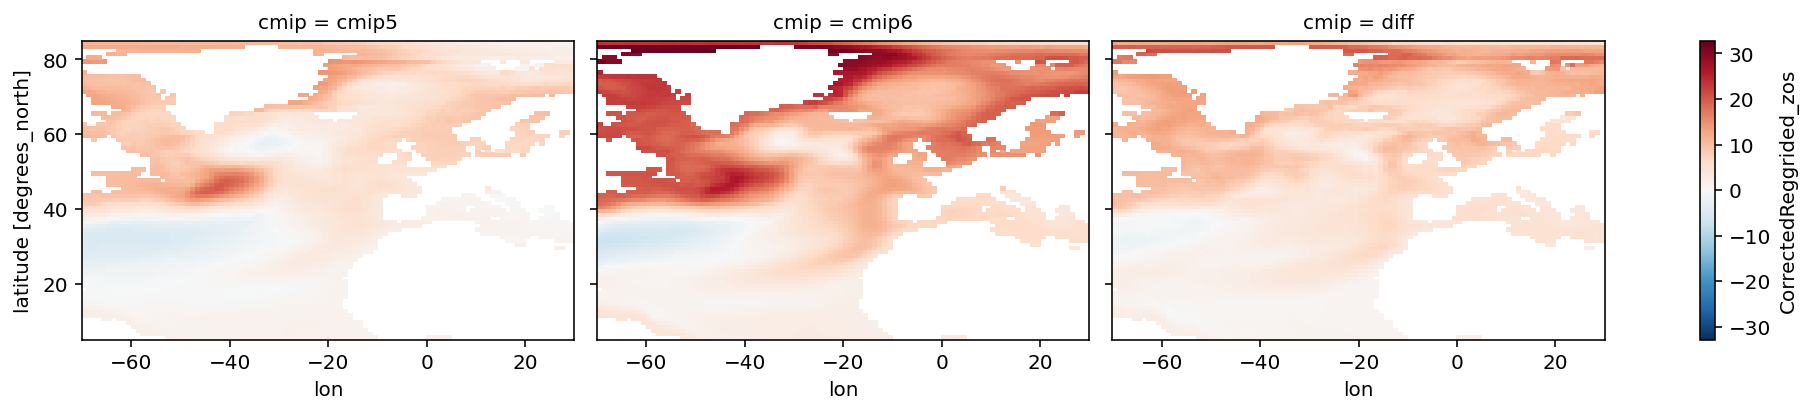

In [88]:
concat_mean.sel(lat=slice(5,85), lon=slice(-70,30)).plot(col='cmip', figsize=(14,3))

#plt.savefig('../figures/zos_comp_{cmip5_sce}_{cmip6_sce}_NorthAtlantic.pdf', dpi=150)

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


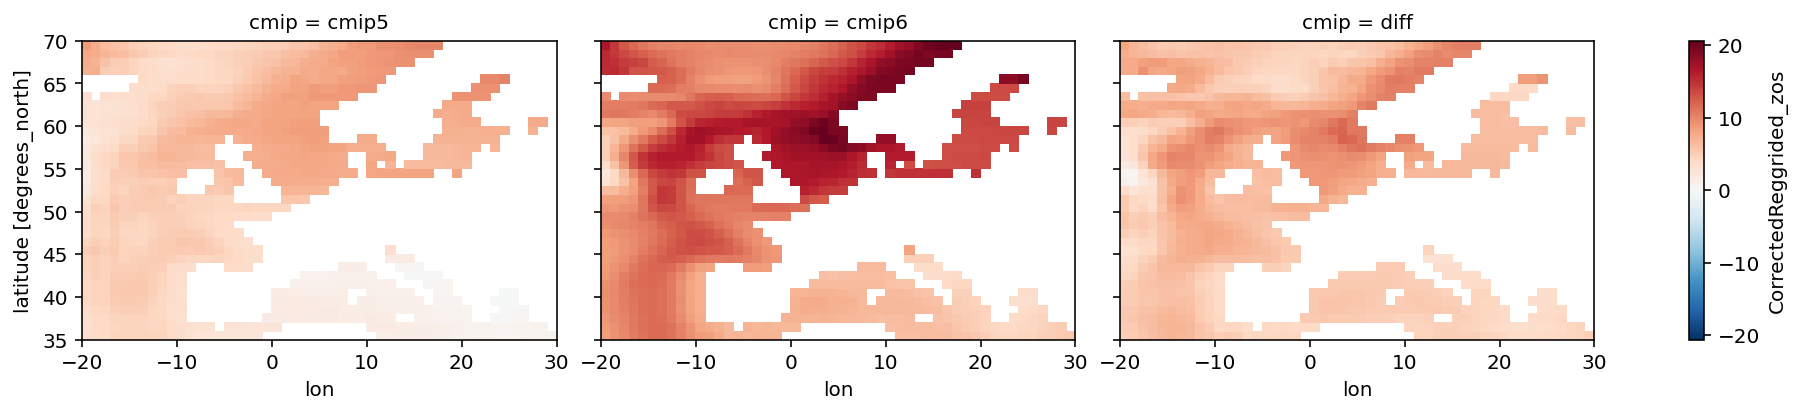

In [89]:
concat_mean.sel(lat=slice(35,70), lon=slice(-20,30)).plot(col='cmip', figsize=(14,3))

#plt.savefig('../figures/zos_comp_{cmip5_sce}_{cmip6_sce}_europe.pdf', dpi=150)

### Improved figures for report

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


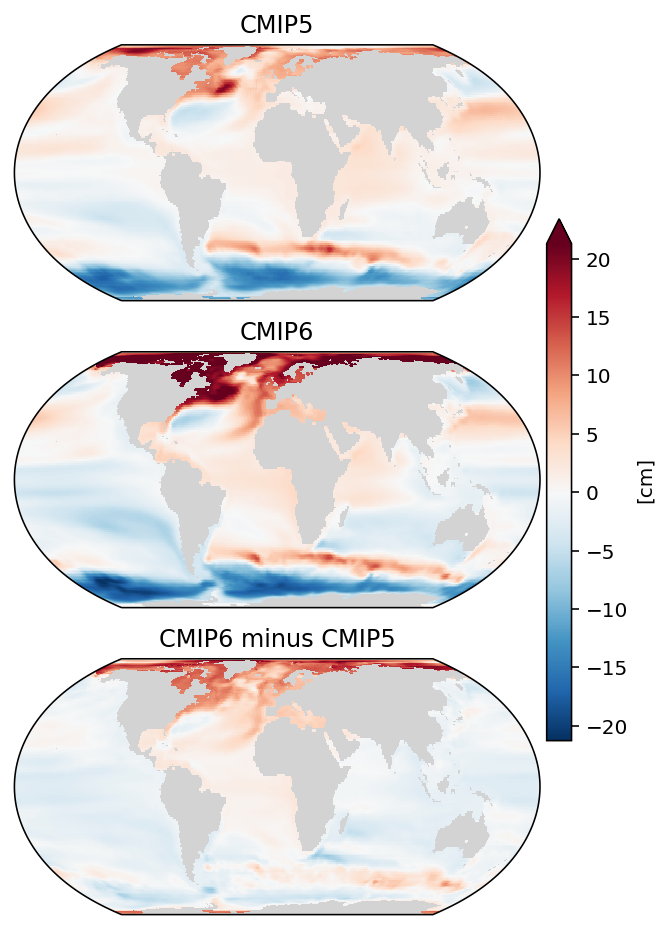

In [101]:
g = concat_mean.plot(
    col='cmip',
    col_wrap=1,
    figsize=(6,8),
    #Projections options: PlateCarree, Mollweide, Robinson, EckertIV, EqualEarth
    subplot_kws=dict(projection=ccrs.EqualEarth(), facecolor="lightgray"),
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation': 'vertical', 'label': '[cm]', 'pad': 0.01, 'shrink':0.6},
    robust=True
    )

titles = ['CMIP5', 'CMIP6', 'CMIP6 minus CMIP5']
for i in range(3):
    g.axes[i,0].set_title(titles[i]) #Index of axis is line,column 

plt.savefig(f'../figures/zos_comp_{cmip5_sce}_{cmip6_sce}_proj_world.pdf', dpi=100)

/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


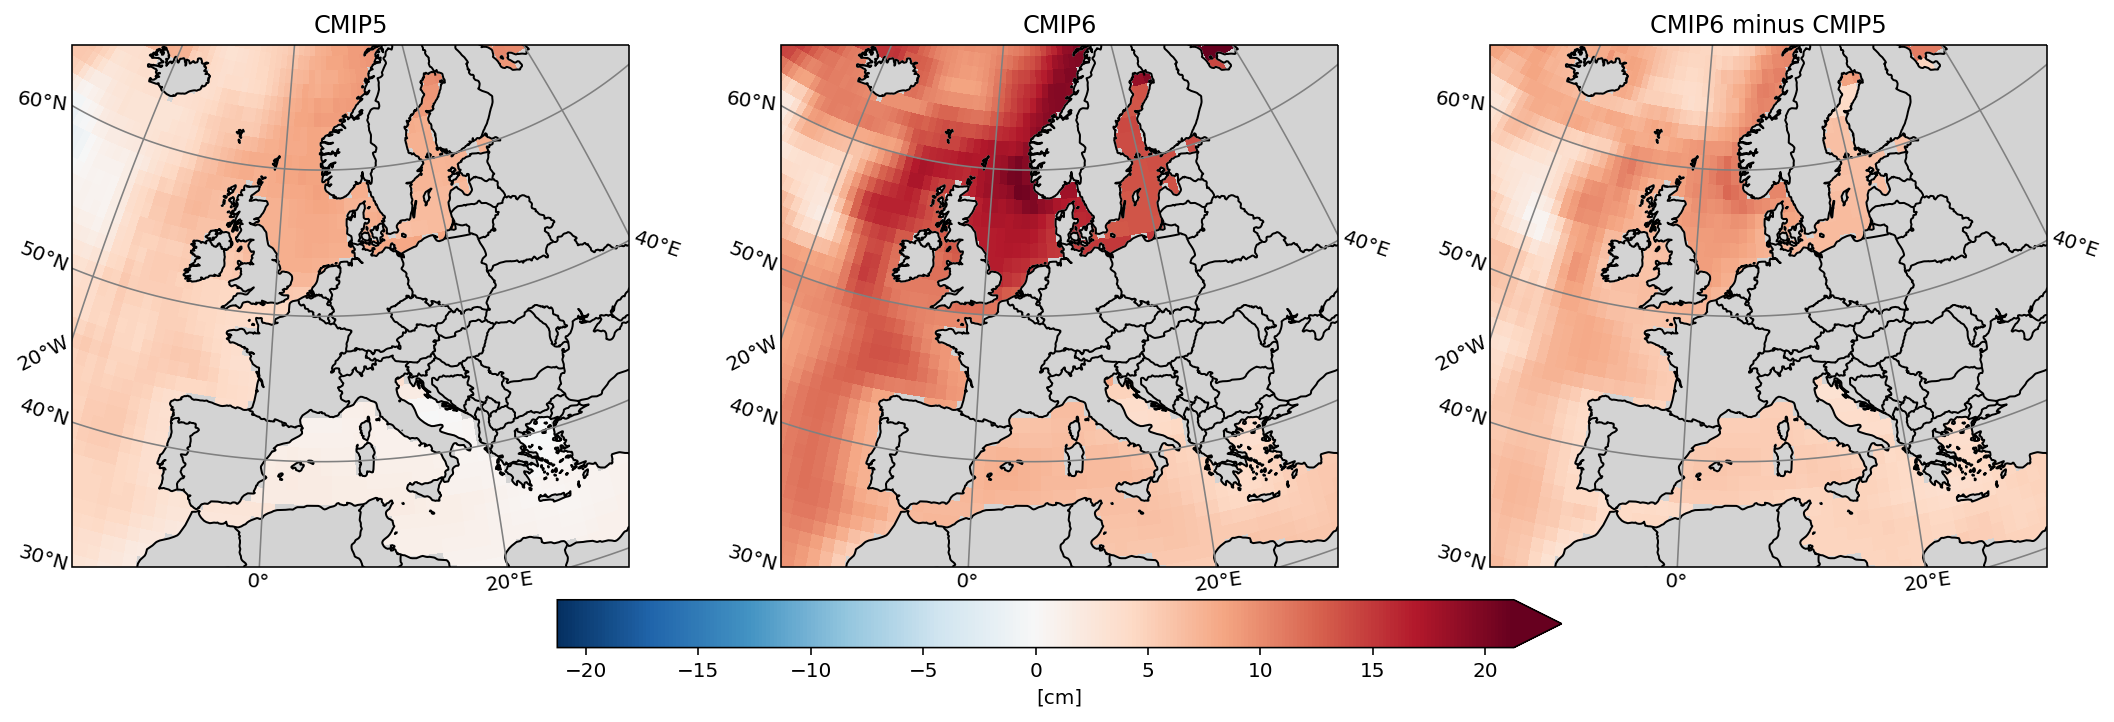

In [97]:
lon_min, lon_max, lat_min, lat_max = -15, 30, 30, 67

#g = concat_mean.sel(lat=slice(lat_min,lat_max+2), lon=slice(lon_min-10,lon_max)).plot(
g = concat_mean.plot(
    col='cmip',
    figsize=(18,6),
    subplot_kws=dict(projection=ccrs.Orthographic(5, 52), facecolor="lightgray"),
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'orientation': 'horizontal', 'label': '[cm]', 'pad': 0.05, 'shrink':0.5},
    robust=True
    )

titles = ['CMIP5', 'CMIP6', 'CMIP6 minus CMIP5']
for i in range(3):
    g.axes[0,i].set_title(titles[i]) #Index of axis is line,column 

    g.axes[0,i].add_feature(cfeature.LAND, facecolor='lightgrey', zorder=1) #zorder=1    
    g.axes[0,i].add_feature(cfeature.BORDERS)
    g.axes[0,i].coastlines()

    gl = g.axes[0,i].gridlines(color='grey', linestyle='-', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    
    g.axes[0,i].set_extent([lon_min, lon_max, lat_min, lat_max])
    
plt.savefig(f'../figures/zos_comp_{cmip5_sce}_{cmip6_sce}_proj_europe.pdf', dpi=100)